# Distiller Summary: checkout tensorboard and state dict data
---

## Setup Notebook
---

### Options - Notebook:
---
Specifu data location that might be one among the folowing:

- either from GDRIVE
- or, "/content/" workspace subdirectory
- or any other else valid and existing location location.

In order to select one of the above location compile the downstream option menu.

In [1]:
#@title Notebook Boolean Knobes (options):
#@markdown ---
CLONE_GITHUB_PROJECT = True #@param {type:"boolean"}
INSTALL_SOME_LIBS = False #@param {type:"boolean"}
INSTALL_DISTILLER_PIP_REQ = False #@param {type:"boolean"}

In [2]:
#@title Notebook Run Knobes (options):
#@markdown ---
RUN_COLAB_CODE = True #@param {type:"boolean"}
RUN_TENSORBOARD_UTIL = False #@param {type:"boolean"}
#@markdown ---
RUN_MAIN_SIREN_BASE = False #@param {type:"boolean"}
RUN_MAIN_SIREN_APP = False #@param {type:"boolean"}
RUN_MAIN_SIREN_APP_SENSITIVITY = True #@param {type:"boolean"}

In [3]:
#@title Data Location (options):
#@markdown ---
TARGET_TB_FILE = "/content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/___2020.11.27-162900/events.out.tfevents.1606494545.c2f9054794c7" #@param {type:"string"}
STATE_DICT_MODEL_FILE = "/content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/___2020.11.27-162900/_checkpoint.pth.tar" #@param {type:"string"}
LOG_DIR = "/content/logs" #@param {type:"string"}


In [4]:
#@title Github related infos (options):
#@markdown ---
PROJECT_NAME_PATH = '/content/distiller' #@param {type:"string"}

    
GITHUB_PROJECT_URL = 'https://github.com/franec94/distiller.git' #@param {type:"string"}
BRANCH_NAME = 'siren-support' #@param {type:"string"}
CMD_TOOL_NAME = '' #@param {type:"string"}

In [5]:
#@title Model HyperParams (options):
#@markdown ---
N_HF = 64 #@param {type:"integer"}
N_HL = 5 #@param {type:"integer"}

### Retrieve Data from Source Location:
- either from GDRIVE
- or, /content/ workspace subdirectory
- or any other else valid and existing location location.

In [6]:
!mkdir {LOG_DIR}

mkdir: cannot create directory ‘/content/logs’: File exists


In [7]:
import os
import shutil

tb_file_name = os.path.basename(f"{TARGET_TB_FILE}")
shutil.copyfile(f"{TARGET_TB_FILE}",
                os.path.join(f"{LOG_DIR}", f"{tb_file_name}"))
try:
    state_dict_file_name = os.path.basename(f"{STATE_DICT_MODEL_FILE}")
    shutil.copyfile(f"{STATE_DICT_MODEL_FILE}",
                os.path.join(f"/content", f"{state_dict_file_name}"))
except Exception as err:
    print(str(err))
    pass

### Clone Github Project

In [8]:
if CLONE_GITHUB_PROJECT:
    import os
    os.chdir('/content')

In [9]:
# Setup wd to remove trash

if CLONE_GITHUB_PROJECT:
    # Remove trash
    import os
    if os.path.exists(f'{PROJECT_NAME_PATH}') and os.path.isdir(f'{PROJECT_NAME_PATH}'):
        print("Cleaning from old project...")
        !rm -r {PROJECT_NAME_PATH}
    else:
        print("No project found.")
        pass

    import os
    logs_base_dir = os.path.join("/content/outputs", "summaries")
    os.makedirs(logs_base_dir, exist_ok=True)

    if os.path.exists(PROJECT_NAME_PATH) is False:
        !git clone {GITHUB_PROJECT_URL}
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        if CMD_TOOL_NAME == None or len(CMD_TOOL_NAME) == 0:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/')
            os.chdir(full_path_cmd)
        else:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/{CMD_TOOL_NAME}')
            os.chdir(full_path_cmd)
    else:
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        !git fetch
        if CMD_TOOL_NAME == None or len(CMD_TOOL_NAME) == 0:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/')
            os.chdir(full_path_cmd)
        else:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/{CMD_TOOL_NAME}')
            os.chdir(full_path_cmd)
        pass
    pass
else:
    print("No github project cloned and no branch activated and switched to!")
    pass

Cleaning from old project...
Cloning into 'distiller'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 6532 (delta 65), reused 64 (delta 29), pack-reused 6430
Receiving objects: 100% (6532/6532), 44.40 MiB | 27.74 MiB/s, done.
Resolving deltas: 100% (4588/4588), done.
Branch 'siren-support' set up to track remote branch 'siren-support' from 'origin'.
Switched to a new branch 'siren-support'


In [10]:
if INSTALL_DISTILLER_PIP_REQ:
    import os
    os.chdir(f'{PROJECT_NAME_PATH}')
    !pip install -r requirements.txt
    os.chdir('/content/')

### Libs

In [11]:
# Installing third party dependencies
if INSTALL_SOME_LIBS:
    print("Installing required libraries...")

    old_requirements = '/content/tmp_requirements.txt'
    !pip freeze > {old_requirements}
    dependencies_list = "stats,pretrainedmodels,torchnet,xlsxwriter,gitpython,python-git,cmapy,sk-video,pytorch-model-summary,ConfigArgParse,tabulate,chart_studio,dash,dash_bootstrap_components".split(",")

    with open(old_requirements) as f:
        old_requirements_list = f.read().split("\n")
        for a_req in dependencies_list:
            found_req = False
            for old_req in old_requirements_list:
                if old_req.startswith(a_req):
                    print(f"{a_req} already installed!")
                    found_req = True
                    break
            if found_req is False:
                !pip install {a_req} -q
        pass
    !rm -f {old_requirements}
    pass

In [12]:
%matplotlib inline
from __future__ import print_function
from __future__ import division

if RUN_COLAB_CODE:


    # --------------------------------------------- #
    # Standard Library, plus some Third Party Libraries
    # --------------------------------------------- #

    DASH_TEMPLATES_LIST = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

    from PIL import Image
    from functools import partial
    from pprint import pprint
    from tqdm import tqdm
    from typing import Tuple, Union


    import configargparse
    import copy
    import collections
    import cProfile
    import datetime
    import functools
    import itertools
    import h5py
    import logging
    import math
    import os
    import operator
    import pickle
    import random
    import shutil
    import sys
    import re
    import tabulate 
    import time
    # import visdom


    from collections import OrderedDict
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    # --------------------------------------------- #
    # Data Science and Machine Learning Libraries
    # --------------------------------------------- #
    import matplotlib
    import matplotlib.pyplot as plt
    matplotlib.style.use('ggplot')
    import seaborn as sns

    import numpy as np
    import pandas as pd
    import sklearn

    from sklearn.model_selection import ParameterGrid
    from sklearn.model_selection import train_test_split

    # --------------------------------------------- #
    # Torch
    # --------------------------------------------- #
    import torch
    try:
        import torch
        import torch.nn as nn
        import torch.nn.functional as F
        import torch.optim as optim
        from torch.utils.data import DataLoader, Dataset
        # import torch.quantization
        # import torch.nn.utils.prune as prune

        from torch import nn, optim

    except Exception as err:
        print(err)
        print("torch not available!")
        pass

    from numpy import linalg as LA
    from scipy.stats import rankdata
    from collections import OrderedDict
    from torchvision import datasets, transforms
    from torch.utils.data.sampler import SubsetRandomSampler

    # --------------------------------------------- #
    # Import: torch_pruning
    # --------------------------------------------- #
    # import torch_pruning as tp


    # --------------------------------------------- #
    # Import: TorchVision
    # --------------------------------------------- #
    try:
        import torchvision
        from torchvision import datasets
        from torchvision import transforms
        from torchvision.transforms import Resize, Compose, ToTensor, CenterCrop, Normalize
        from torchvision.utils import save_image
    except:
        print("torchvision library not available!")
        pass

    # Plotly imports.
    # ----------------------------------------------- #
    import chart_studio.plotly as py
    import plotly.figure_factory as ff
    import plotly.express as px

    # --------------------------------------------- #
    # Import: skimage
    # --------------------------------------------- #
    try:
        import skimage
        import skimage.metrics as skmetrics
        from skimage.metrics import peak_signal_noise_ratio as psnr
        from skimage.metrics import structural_similarity as ssim
        from skimage.metrics import mean_squared_error
    except:
        print("skimage library not available!")
        pass

### PyTorch Architectures

In [13]:
if RUN_COLAB_CODE:
    class SineLayer(nn.Module):
        # See paper sec. 3.2, final paragraph, and supplement Sec. 1.5 for discussion of omega_0.
        
        # If is_first=True, omega_0 is a frequency factor which simply multiplies the activations before the 
        # nonlinearity. Different signals may require different omega_0 in the first layer - this is a 
        # hyperparameter.
        
        # If is_first=False, then the weights will be divided by omega_0 so as to keep the magnitude of 
        # activations constant, but boost gradients to the weight matrix (see supplement Sec. 1.5)
        
        def __init__(self, in_features, out_features, bias=True,
                    is_first=False, omega_0=30):
            super().__init__()
            self.omega_0 = omega_0
            self.is_first = is_first
            
            self.in_features = in_features
            self.linear = nn.Linear(in_features, out_features, bias=bias)
            
            self.init_weights()
            pass
        
        def init_weights(self):
            with torch.no_grad():
                if self.is_first:
                    self.linear.weight.uniform_(-1 / self.in_features, 
                                                1 / self.in_features)      
                else:
                    self.linear.weight.uniform_(-np.sqrt(6 / self.in_features) / self.omega_0, 
                                                np.sqrt(6 / self.in_features) / self.omega_0)
            pass
            
        def forward(self, input):
            return torch.sin(self.omega_0 * self.linear(input))
        
        def forward_with_intermediate(self, input): 
            # For visualization of activation distributions
            intermediate = self.omega_0 * self.linear(input)
            return torch.sin(intermediate), intermediate
        pass
        
        
    class Siren(nn.Module):
        def __init__(self, in_features, hidden_features, hidden_layers, out_features, outermost_linear=False, 
                    first_omega_0=30, hidden_omega_0=30.):
            super().__init__()
            
            self.net = []
            self.net.append(SineLayer(in_features, hidden_features, 
                                    is_first=True, omega_0=first_omega_0))

            for i in range(hidden_layers):
                self.net.append(SineLayer(hidden_features, hidden_features, 
                                        is_first=False, omega_0=hidden_omega_0))

            if outermost_linear:
                final_linear = nn.Linear(hidden_features, out_features)
                
                with torch.no_grad():
                    final_linear.weight.uniform_(-np.sqrt(6 / hidden_features) / hidden_omega_0, 
                                                np.sqrt(6 / hidden_features) / hidden_omega_0)
                    
                self.net.append(final_linear)
            else:
                self.net.append(SineLayer(hidden_features, out_features, 
                                        is_first=False, omega_0=hidden_omega_0))
            
            self.net = nn.Sequential(*self.net)
            pass
        
        def forward(self, coords):
            coords = coords.clone().detach().requires_grad_(True) # allows to take derivative w.r.t. input
            output = self.net(coords)
            return output, coords        

        def forward_with_activations(self, coords, retain_grad=False):
            '''Returns not only model output, but also intermediate activations.
            Only used for visualizing activations later!'''
            activations = OrderedDict()

            activation_count = 0
            x = coords.clone().detach().requires_grad_(True)
            activations['input'] = x
            for i, layer in enumerate(self.net):
                if isinstance(layer, SineLayer):
                    x, intermed = layer.forward_with_intermediate(x)
                    
                    if retain_grad:
                        x.retain_grad()
                        intermed.retain_grad()
                        
                    activations['_'.join((str(layer.__class__), "%d" % activation_count))] = intermed
                    activation_count += 1
                else: 
                    x = layer(x)
                    
                    if retain_grad:
                        x.retain_grad()
                        
                activations['_'.join((str(layer.__class__), "%d" % activation_count))] = x
                activation_count += 1

            return activations
        pass

## Tests
---

### Tensorboard

In [14]:
!kill 2366

/bin/bash: line 0: kill: (2366) - No such process


In [15]:
if RUN_TENSORBOARD_UTIL:
    %reload_ext tensorboard

In [16]:
if RUN_TENSORBOARD_UTIL:
    %tensorboard --logdir {LOG_DIR}

### Checkout State dict file

#### Colab Code

In [17]:
import os
os.chdir('/content/distiller')

In [18]:
import distiller
distiller.__version__

'Unknown'

In [19]:
import os
import torch.nn as nn
from distiller.models import register_user_model
import distiller.apputils.siren_image_regressor as regressor
import distiller.apputils

In [20]:
import qgrid

if RUN_COLAB_CODE:
    # Load some common jupyter code
    # !cp /content/distiller/jupyter/distiller_jupyter_helpers.ipynb /content/distiller_jupyter_helpers.ipynb
    # %run /content/distiller_jupyter_helpers.ipynb
    import ipywidgets as widgets
    from ipywidgets import interactive, interact, Layout

    # Some models have long node names and require longer lines
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

    def pretty_int(i):
        return "{:,}".format(i)

In [21]:
if RUN_COLAB_CODE:
    def siren_model_create(n_hf=N_HF, n_hl=N_HL):
        img_siren = Siren(in_features=2, out_features=1, hidden_features=n_hf, 
                  hidden_layers=n_hl, outermost_linear=True)
        return img_siren

In [22]:
if RUN_COLAB_CODE:
    distiller.models.register_user_model(arch="SirenCompressingModel", dataset="cameramen", model=siren_model_create)
    model = distiller.models.create_model(pretrained=False, dataset="cameramen", arch="SirenCompressingModel")
    assert model is not None

In [23]:
if RUN_COLAB_CODE:
    for name, module in model.named_modules():
        print(name)


net
net.0
net.0.linear
net.1
net.1.linear
net.2
net.2.linear
net.3
net.3.linear
net.4
net.4.linear
net.5
net.5.linear
net.6


In [24]:
if RUN_COLAB_CODE:
    def init_jupyter_default_args(args):
        args.output_dir = '/content/' # None # 
        args.evaluate = False
        args.seed = 0
        args.deterministic = True
        args.cpu = True
        args.gpus = "0"
        args.load_serialized = False
        args.deprecated_resume = None
        args.resumed_checkpoint_path = None
        args.load_model_path = None
        args.reset_optimizer = False
        args.lr = args.momentum = args.weight_decay = 0.
        args.compress = '/content/distiller/examples/agp-pruning/siren64-5_schedule_agp.yaml'
        args.epochs = 0
        args.activation_stats = list()
        args.batch_size = 1
        args.workers = 1
        args.validation_split = 0.1
        args.effective_train_size = args.effective_valid_size = args.effective_test_size = 1.
        args.log_params_histograms = False
        args.print_freq = 10
        args.masks_sparsity = False
        args.display_confusion = False
        args.num_best_scores = 1
        args.name = ""
        args.kd_policy = None
        # args.summary = "sparsity"
        args.qe_stats_file = None
        args.verbose = False
        return args


    def config_learner_args(args, arch, dataset, dataset_path, pretrained, adam_args, batch, epochs):
        args.arch = f"{arch}"
        args.dataset = f"{dataset}"
        args.data = ""
        args.pretrained = False
        args.lr = adam_args[0]
        args.momentum = adam_args[1]
        args.weight_decay = adam_args[2]
        args.batch_size = 1
        args.epochs = epochs
        return args

In [25]:
if RUN_COLAB_CODE:
    args = regressor.init_regressor_compression_arg_parser()
    args, unknownargs = args.parse_known_args()
    pprint(args)

Namespace(activation_histograms=None, activation_stats=[], arch='siren', batch_size=256, compress=None, cpu=False, data='/root/.local/share/jupyter/runtime/kernel-66eb6401-9d4c-40f5-8585-359f77523f00.json', deprecated_resume='', deterministic=False, display_confusion=False, effective_test_size=1.0, effective_train_size=1.0, effective_valid_size=1.0, epochs=90, evaluate=False, export_onnx=None, gpus=None, load_model_path='', load_serialized=False, log_params_histograms=False, lr=0.1, masks_sparsity=False, momentum=0.9, name=None, num_best_scores=1, number_hidden_features=8, number_hidden_layerss=8, output_dir='logs', pretrained=False, print_freq=10, qe_bits_accum=32, qe_bits_acts=8, qe_bits_wts=8, qe_calibration=None, qe_clip_acts=<ClipMode.NONE: 0>, qe_clip_n_stds=None, qe_config_file=None, qe_convert_pytorch=False, qe_dynamic=False, qe_mode=<LinearQuantMode.SYMMETRIC: 1>, qe_mode_acts=None, qe_mode_wts=None, qe_no_clip_layers=[], qe_no_quant_layers=[], qe_per_channel=False, qe_pytorch

In [26]:
if RUN_COLAB_CODE:
    args = init_jupyter_default_args(args)

In [27]:
if RUN_COLAB_CODE:
    args = config_learner_args(args, "SirenCompressingModel", "cameramen", "", False, (0.1, 0.0, 1e-4) , 1, 100)

In [28]:
if RUN_COLAB_CODE:
    model = distiller.models.create_model(\
        pretrained=True, dataset="cameramen", arch="SirenCompressingModel")

    state_dict_file_name = os.path.basename(f"{STATE_DICT_MODEL_FILE}")
    checkpoint_file = os.path.join(f"/content", f"{state_dict_file_name}")

    print(checkpoint_file)
    
    distiller.apputils.load_checkpoint(
        model = None,
        chkpt_file = checkpoint_file,
        model_device = 'cpu')

/content/_checkpoint.pth.tar


### Print a summary of the statistics of the model attributes in tabular format

Distiller generates several different summary reports, which are returned as Pandas dataframes which you can slice, dice and sort using Pandas' rich API.<br>
<br>
MACs are multiply-accumulate operations: a MAC unit computes the product of two elements and adds the product to an accumulator.  The MACs reported by distiller.model_performance_summary are for direct GEMM (General Matrix-Matrix Multiplication) and convolution.  Different hardware uses specific algorithms at different times.  For example, [Intel's MKL-DNN](https://intel.github.io/mkl-dnn/) uses [Winograd](https://arxiv.org/pdf/1509.09308.pdf) for 3x3 convolutions.  As another example, [convolutions are sometimes computed using GEMM](https://petewarden.com/2015/04/20/why-gemm-is-at-the-heart-of-deep-learning/) for increased utilization of vectorized hardware.<br>


<br>
In the example below, we display some statistics about the sizes and shapes of the feature-maps and weight tensors, and some other goodies. :-)

In [29]:
if RUN_COLAB_CODE:
    dummy_input = torch.randn(1, 1, 256*256, 2)
    # dummy_input = torch.randn(1, 2)
    df = distiller.model_performance_summary(model, dummy_input, 1)
    """
    df.to_csv('/content/tmp.csv')
    # df = pd.DataFrame(data = df.values, columns = df.columns, engine='python', encoding='utf-8')
    columns = df.columns
    df = pd.read_csv('/content/tmp.csv', engine='python', encoding='utf-8')
    if "Unnamed: 0" in df.columns:
        df = df.drop(labels = ["Unnamed: 0"], axis = 1)
    df.columns = columns
    """

    # You can display summaries using several backends, and each has its advantages and disadvantages, so you will want to use them in different situations.
    print("Weights shapes, sizes and statistics (showing only FC and convolution layers):")
    print("\tTotal IFM footprint (elements): " + "{:,}".format(df['IFM volume'].sum()))
    print("\tTotal OFM footprint (elements): " + "{:,}".format(df['OFM volume'].sum()))
    print("\tTotal weights footprint (elements): " + "{:,}".format(df['Weights volume'].sum()))
        
    # 1. As a textual table
    # t = distiller.model_performance_tbl_summary(model, dummy_input, 1)
    # print(t)

    # 2. As a plain Pandas dataframe
    display(df)

    # 3. As a QGrid table, which you can sort and filter.
    # qgrid.show_grid(df)
    pass

Weights shapes, sizes and statistics (showing only FC and convolution layers):
	Total IFM footprint (elements): 25,296,896
	Total OFM footprint (elements): 25,231,360
	Total weights footprint (elements): 20,672


,Name,Type,Attrs,IFM,IFM volume,OFM,OFM volume,Weights volume,MACs
0,net.0.linear,Linear,,"(1, 1, 65536, 2)",131072,"(1, 1, 65536, 64)",4194304,128,128
1,net.1.linear,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 64)",4194304,4096,4096
2,net.2.linear,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 64)",4194304,4096,4096
3,net.3.linear,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 64)",4194304,4096,4096
4,net.4.linear,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 64)",4194304,4096,4096
5,net.5.linear,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 64)",4194304,4096,4096
6,net.6,Linear,,"(1, 1, 65536, 64)",4194304,"(1, 1, 65536, 1)",65536,64,64


### Compare weights footprint to feature-map footprint

Memory footprint, bandwidth and throughput are different concepts.  Footprint is the size amount of memory required to store a piece of data (e.g. measured as number of bytes).  Bandwidth is the rate at which data can be read or written (stored) from/to memory by different hardware (e.g. measured as bytes/sec).  Throughput is a measure of the data that actually moves (read/stored) in a period of time (bytes/sec).<br>
Because the amount of data required for a typical neural-network operation is often larger than the available working memory of the compute hardware (e.g. CPU registers and cache), data often needs to be sliced into tiles (blocks).  The sizes of the tiles, together with the memory access pattern and the compute algorithm, determine the total amount of data that needs to move around (read/stored).  Because of this hardware dependency, we provide below information regarding memory footprint and not throughput.

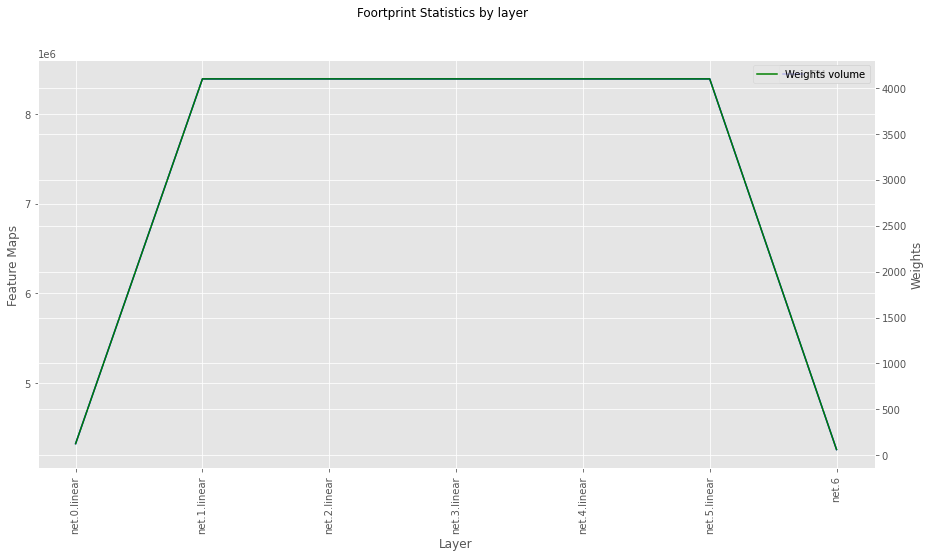

In [30]:
if RUN_COLAB_CODE:
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(15,7.5))
    fig.suptitle("Foortprint Statistics by layer")
    ax.set_ylabel("Feature Maps")
    ax.set_xlabel("Layer")
    ax2 = ax.twinx()
    ax2.set_ylabel("Weights")
    ax.set_xticklabels(df.Name, rotation=90);

    df["FM volume"] = df["OFM volume"] + df["IFM volume"]
    df[["Name","FM volume"]].plot(ax=ax, xticks=range(len(df.index)), style="b-", rot=90)
    df[["Name","Weights volume"]].plot(ax=ax2, style="g-", use_index=True, rot=90)
    plt.show()

### Compare data footprint to compute (MACs)

We measure Footprint in number of elements, not bytes.  If, for example, the elements data type is FP32, then the real footprint is 4x the reported footprint.

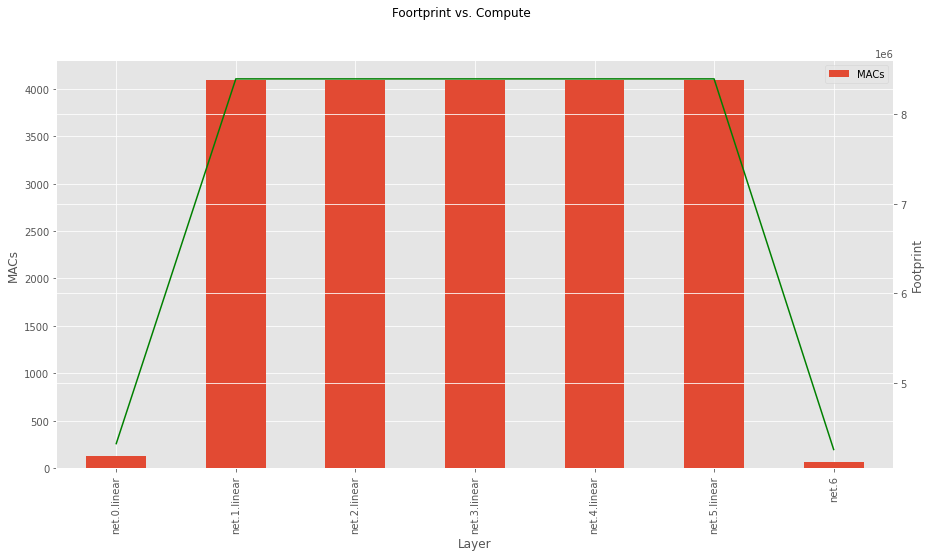

In [31]:
if RUN_COLAB_CODE:
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(15,7.5))
    fig.suptitle("Foortprint vs. Compute")
    ax.set_ylabel("MACs")
    ax.set_xlabel("Layer")
    ax2 = ax.twinx()
    ax2.set_ylabel("Footprint")

    df[["Name", "MACs"]].plot(ax=ax, kind='bar', rot=90,  xticks=range(len(df.index)), figsize=[15,7.5])
    ax.set_xticklabels(df.Name, rotation=90);

    df2 = df["Weights volume"] + df["OFM volume"] + df["IFM volume"]
    df2.plot(ax=ax2, style="g-", use_index=True, rot=90)
    plt.show()

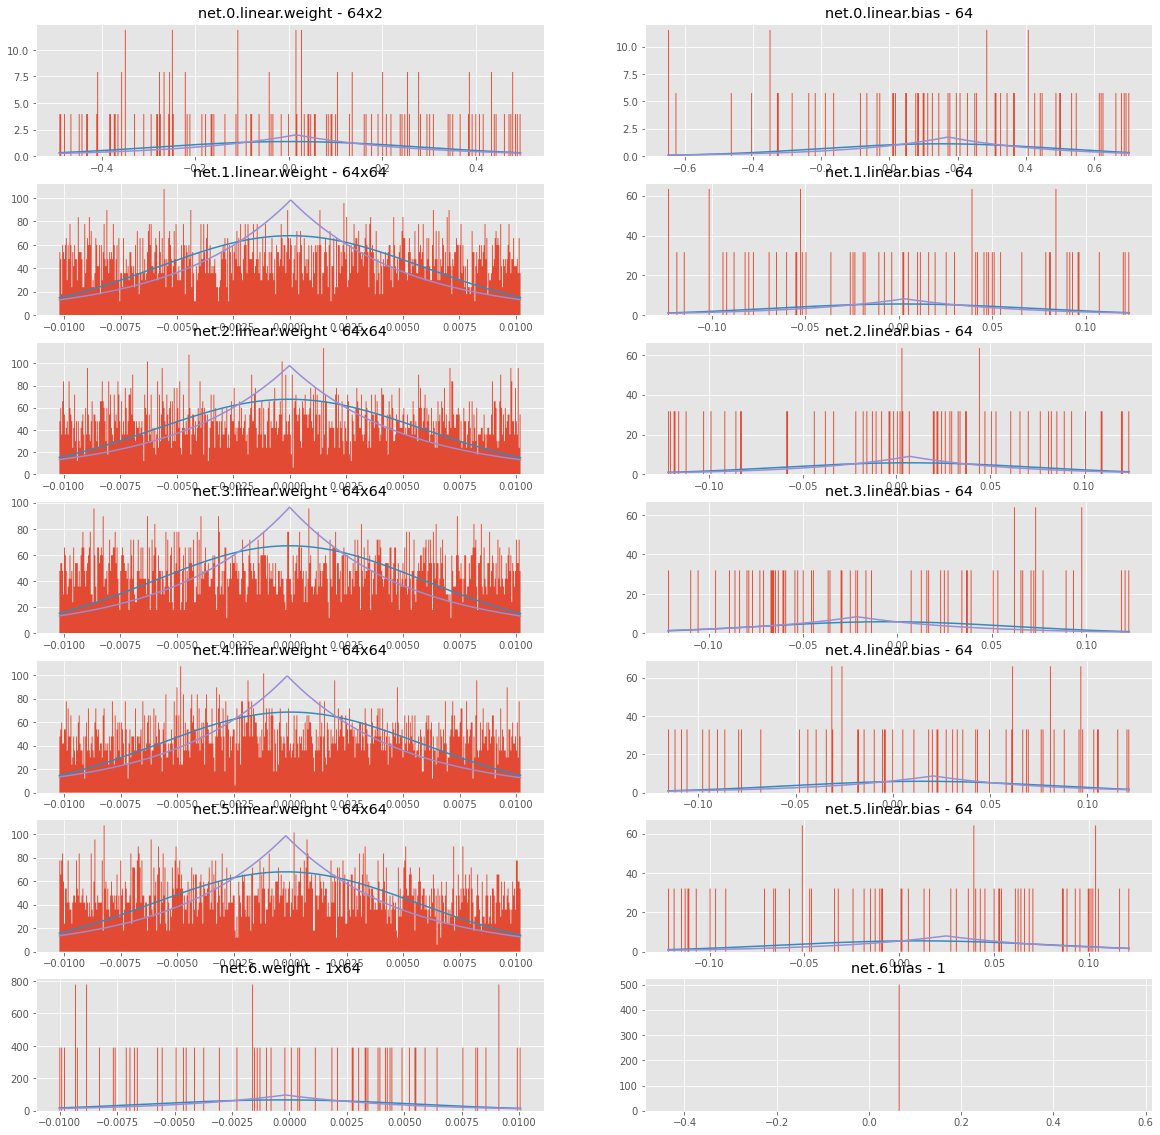

In [32]:
if RUN_COLAB_CODE:
    %matplotlib inline
    import scipy.stats as ss
    def getSparsity(x):
        return 1 - (x[x.nonzero()].size / x.size)

    REMOVE_ZEROS = False
    SHOW_OF_BIASES = False
    GRID_PICTURES = True
    nbins = 500
    if GRID_PICTURES:
        cnt = 0
        for name, weights in model.named_parameters():
            if SHOW_OF_BIASES and name.endswith('bias'): continue
            cnt += 1
        n = cnt // 2 if cnt % 2 == 0 else cnt // 2 + 2
        fig, axes = plt.subplots(n, 2, figsize=(20, 20))
        axes = list(itertools.chain(*axes))
        pass
    for ii, (name, weights) in enumerate(model.named_parameters()):
        if SHOW_OF_BIASES and name.endswith('bias'): continue
        
        # not convolution layer
        # if weights.dim() != 4: continue

        shape_str = "x".join(map(str, weights.shape))
        weights = weights.cpu().detach().numpy().flatten()
        sparsity = getSparsity(weights)

        if REMOVE_ZEROS:
            # Optionally remove zeros (lots of zeros will dominate the histogram and the 
            # other data will be hard to see
            weights = weights[weights.nonzero()]

        # Fit the data to the Normal distribution
        (mean_fitted, std_fitted) = ss.norm.fit(weights)
        x = np.linspace(min(weights), max(weights), nbins)
        weights_gauss_fitted = ss.norm.pdf(x, loc=mean_fitted, scale=std_fitted)

        # Fit the data to the Laplacian distribution
        (mean_fitted, std_fitted) = ss.laplace.fit(weights)
        weights_laplace_fitted = ss.laplace.pdf(x, loc=mean_fitted, scale=std_fitted)

        if not GRID_PICTURES:
            fig = plt.figure()
            n, bins, patches = plt.hist(weights, histtype='stepfilled', 
                                    cumulative=False, bins=nbins, density=True)
            
            plt.plot(x, weights_gauss_fitted, label='gauss')
            plt.plot(x, weights_laplace_fitted, label='laplace')

            plt.title(name + " - " + shape_str + (
                ' - sparsity: {:.0%}'.format(sparsity) if REMOVE_ZEROS else ''))
            #plt.figure(figsize=(10,5))
            plt.legend()
            plt.show()
        else:
            ax = axes[ii]
            n, bins, patches = ax.hist(weights, histtype='stepfilled', 
                                    cumulative=False, bins=nbins, density=True)
            
            ax.plot(x, weights_gauss_fitted, label='gauss')
            ax.plot(x, weights_laplace_fitted, label='laplace')

            ax.set_title(name + " - " + shape_str + (
                ' - sparsity: {:.0%}'.format(sparsity) if REMOVE_ZEROS else ''))
            pass
        pass
    if GRID_PICTURES:
        plt.show()
    pass

### Sensitivity test

In [33]:
if RUN_MAIN_SIREN_APP_SENSITIVITY:
    !python siren_main_app.py \
        --logging_root '/content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen' \
        --experiment_name 'train' \
        --sidelength 256 \
        --num_epochs 20 \
        --n_hf {N_HF}  \
        --n_hl {N_HL} \
        --verbose 0 \
        --sense element \
        --exp-load-weights-from "{STATE_DICT_MODEL_FILE}"
    pass

Could not find the logger configuration file (/content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/logging.conf) - using default logger configuration
Log file for this run: /content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/___2020.11.28-163804/___2020.11.28-163804.log
Random seed: 0

--------------------------------------------------------
Logging to TensorBoard - remember to execute the server:
> tensorboard --logdir='./logs'

=> created a SirenCompressingModel model with the cameramen dataset
=> loading checkpoint /content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/___2020.11.27-162900/_checkpoint.pth.tar
=> Checkpoint contents:
+----------------------+-------------+-----------------------+
| Key                  | Type        | Value                 |
|----------------------+-------------+-----------------------|
| arch                 | str         | SirenCompressingModel |
| compression_sched    | dict        |                

In [34]:
if RUN_MAIN_SIREN_APP_SENSITIVITY:
    import ipywidgets as widgets
    from ipywidgets import interactive, interact, Layout
    df = pd.read_csv('/content/drive/MyDrive/Siren Deep Learning Analyses/results/cameramen/___2020.11.28-160916/sensitivity.csv')
    df['sparsity'] = round(df['sparsity'], 2)
    display(df.head(5))


,parameter,sparsity,loss,psnr_score,ssim_score
0,net.0.linear.weight,0.00,0.000035,50.524716,0.995707
1,net.0.linear.weight,0.05,0.005572,28.612460,0.832808
2,net.0.linear.weight,0.10,0.013554,24.761117,0.719703
3,net.0.linear.weight,0.15,0.083150,16.852326,0.444754
4,net.0.linear.weight,0.20,0.196652,13.095961,0.281120


In [35]:
if RUN_MAIN_SIREN_APP_SENSITIVITY:
    from collections import OrderedDict

    def get_param_names(df):
        return list(set(df['parameter']))

    def get_sensitivity_levels(df):
        return list(set(df['sparsity']))

    def df2sensitivities(df):
        param_names = get_param_names(df)
        sparsities = get_sensitivity_levels(df)

        sensitivities = {}
        for param_name in param_names:
            sensitivities[param_name] = OrderedDict()
            param_stats = df[(df.parameter == param_name)]
            
            for row in range(len(param_stats.index)):
                s = param_stats.iloc[[row]].sparsity
                loss = param_stats.iloc[[row]].loss
                psnr_score = param_stats.iloc[[row]].psnr_score
                ssim_score = param_stats.iloc[[row]].ssim_score
                sensitivities[param_name][float(s)] = (float(loss), float(psnr_score), float(ssim_score))
        return sensitivities 

    def view2(level, acc):
        filtered = df[df.sparsity == level]
        s = filtered.style.apply(highlight_min_max)
        
        param_names = filtered['parameter']
        
        # Plot the sensitivities
        x = range(filtered[acc].shape[0])
        y = filtered[acc].values.tolist()
        fig = plt.figure(figsize=(20,10))
        plt.plot(x, y, label=param_names, marker="o", markersize=10, markerfacecolor="C1")
        plt.ylabel(str(acc))
        plt.xlabel('parameter')
        plt.xticks(rotation='vertical')
        plt.xticks(x, param_names)
        plt.title('Pruning Sensitivity per layer %d' % level) 
        #return s

    def highlight_min_max(s):
        """Highlight the max and min values in the series"""
        if s.name not in ['loss', 'psnr_score', 'ssim_score']:
            return ['' for v in s] 
        
        is_max = s == s.max()
        maxes = ['background-color: green' if v else '' for v in is_max]
        is_min = s == s.min()
        mins = ['background-color: red' if v else '' for v in is_min]    
        return [h1 if len(h1)>len(h2) else h2 for (h1,h2) in zip(maxes, mins)]

    sparsities = np.sort(get_sensitivity_levels(df))
    acc_radio = widgets.RadioButtons(options=['loss', 'psnr_score', 'ssim_score'], value='psnr_score', description='Scores:')
    levels_dropdown = widgets.Dropdown(description='Sparsity:', options=sparsities)
    interact(view2, level=levels_dropdown, acc=acc_radio);

interactive(children=(Dropdown(description='Sparsity:', options=(0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0…

In [39]:
if RUN_MAIN_SIREN_APP_SENSITIVITY:
    # assign a different color to each parameter (otherwise, colors change on us as we make different selections)
    param_names = sorted(df['parameter'].unique().tolist())
    color_idx = np.linspace(0, 1, len(param_names))
    colors = {}  
    for i, pname in zip(color_idx, param_names):
        colors[pname] = color= plt.get_cmap('tab20')(i)
    plt.rcParams.update({'font.size': 18})

    def view(weights='', acc=0):
        sensitivities= None
        if weights[0]=='All':
            sensitivities = df2sensitivities(df)
        else:
            mask = False
            mask = [(df.parameter == pname) for pname in weights]
            mask = np.logical_or.reduce(mask)
            sensitivities = df2sensitivities(df[mask])


        # Plot the sensitivities
        fig = plt.figure(figsize=(20,10))
        for param_name, sensitivity in sensitivities.items():
            sense = [values[acc] for sparsity, values in sensitivity.items()]
            sparsities = [sparsity for sparsity, values in sensitivity.items()]
            plt.plot(sparsities, sense, label=param_name, marker="o", markersize=10, color=colors[param_name])
        acc
        labels_dict = {'loss': 0, 'psnr_score': 1, 'ssim_score': 2}
        reverse_labels_dict = dict(map(lambda item: (item[1],item[0]), labels_dict.items()))
        plt.ylabel(f'{reverse_labels_dict[acc]}')
        plt.xlabel('sparsity')
        plt.title('Pruning Sensitivity')
        #plt.legend(loc='lower center', ncol=2, mode="expand", borderaxespad=0.);
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

    items = ['All']+param_names
    w = widgets.SelectMultiple(options=items, value=[items[1]], layout=Layout(width='50%'), description='Weights:')
    acc_widget = widgets.RadioButtons(options={'loss': 0, 'psnr_score': 1, 'ssim_score': 2}, value=0, description='Scores:')
    # interactive(view, acc=acc_widget, weights=w);
    interact(view, acc=acc_widget, weights=w);

interactive(children=(SelectMultiple(description='Weights:', index=(1,), layout=Layout(width='50%'), options=(…

In [37]:
if RUN_MAIN_SIREN_APP_SENSITIVITY:
    def view_sparsity(param_name):
        display(df[df['parameter']==param_name])

    param_names = sorted(df['parameter'].unique().tolist())
    param_dropdown = widgets.Dropdown(description='Parameter:', options=param_names)
    interact(view_sparsity, param_name=param_dropdown);

interactive(children=(Dropdown(description='Parameter:', options=('net.0.linear.weight', 'net.1.linear.weight'…

## References
---

<div id="Gray-et-al-2015"></div> **Andrew Lavin and Scott Gray**. 
    [*Fast Algorithms for Convolutional Neural Networks*](https://arxiv.org/pdf/1509.09308.pdf),
    2015.
<div id="Hao-et-al-2016"></div> **Hao Li, Asim Kadav, Igor Durdanovic, Hanan Samet, and Hans Peter Graf**. 
    [*Pruning filters for efficient convnets*](https://arxiv.org/abs/1608.08710),
    2016.